In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./data/ex2data1.txt',names=['Exam1','Exam2','Accepted'])
data.head()

,Exam1,Exam2,Accepted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


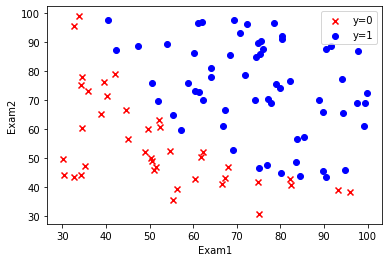

In [5]:
fig,ax = plt.subplots()

ax.scatter(data[data['Accepted']==0]['Exam1'],data[data['Accepted']==0]['Exam2'],c = 'r',marker = 'x',label = 'y=0')
ax.scatter(data[data['Accepted']==1]['Exam1'],data[data['Accepted']==1]['Exam2'],c = 'b',marker = 'o',label = 'y=1')
ax.legend()
ax.set(xlabel='Exam1',ylabel='Exam2')
plt.show()

In [6]:
def get_Xy(data):
    data.insert(0,'Ones',1)
    X = data.iloc[:,0:-1]
    y = data.iloc[:,-1]
    X,y = X.values,y.values.reshape(-1,1)
    return X,y

In [7]:
X,y = get_Xy(data)

In [8]:
X.shape

(100, 3)

定义损失函数

In [9]:
def sigmoid(z):
    return 1/(1+np.exp(-z))   

In [10]:
def costFunction(X,y,theta):
    A = sigmoid(X @ theta)
    first = y * np.log(A)
    second = (1-y) * np.log( 1 - A)
    return -np.sum(first+second)/len(X)

In [11]:
theta = np.zeros((3,1))
theta.shape

(3, 1)

In [12]:
cost_init = costFunction(X,y,theta)
cost_init

0.6931471805599453

In [39]:
def gradientDescent(X,y,theta,alpha,iters):
    costs = []
    
    for i in range(iters):
        A = sigmoid(X@theta)
        theta = theta-(alpha/len(X))*X.T@(A-y)
        cost = costFunction(X,y,theta)
        costs.append(cost)
        if i % 1000 == 0:
            print(cost)
    return theta,costs

In [44]:
alpha = 0.004
iters = 200000

In [46]:
theta_final,costs = gradientDescent(X,y,theta,alpha,iters)

0.2167146439648072
0.21609548952461455
0.21549463305319677
0.21491151319994534
0.21434558729229225
0.2137963309652945
0.2132632378269398
0.21274581917037177
0.2122436037462512
0.21175613761254158
0.21128298408370658
0.21082372380858977
0.21037795501608197
0.2099452939821584
0.20952537579204372
0.2091178555008522
0.20872240983931659
0.20833873967459893
0.2079665735318186
0.20760567262544466
0.20725583806920791
0.20691692127076583
0.20658883904016187
0.20627159575011242
0.20596531612840688
0.20567029412004328
0.2053870658665802
0.20511651799125286
0.20486004450987091
0.20461976141704852
0.20439876260626857
0.204201322744786
0.2040327808873977
0.203898606630994
0.2038022033885985
0.20374205416673255
0.2037106367253714
0.2036971945843636
0.20369239994237653
0.2036907796741413
0.2036900528793068
0.20368952127971096
0.20368902384120982
0.20368853208339988
0.20368804209381913
0.20368755344889164
0.20368706610943796
0.20368658006941914
0.20368609532505444
0.2036856118726946
0.20368512970870611

In [47]:
theta_final

array([[-24.24872778],
       [  0.19893299],
       [  0.19408651]])

In [48]:
def predict(X,theta):
    prob = sigmoid(X@theta)
    return [1 if x >=0.5 else 0 for x in prob]

In [49]:
y_ = np.array(predict(X,theta_final))
y_pre = y_.reshape(len(y_),1)

acc = np.mean(y_pre==y)
print(acc)

0.89


In [50]:
coef1 = -theta_final[0,0]/theta_final[2,0]
coef2 = -theta_final[1,0]/theta_final[2,0]

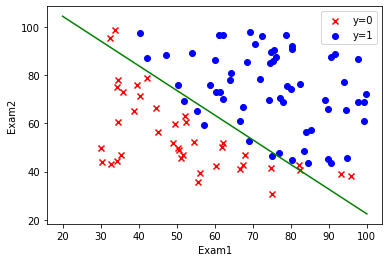

In [51]:
x = np.linspace(20,100,100)
f = coef1 + coef2 * x

fig,ax = plt.subplots()
ax.scatter(data[data['Accepted']==0]['Exam1'],data[data['Accepted']==0]['Exam2'],c = 'r',marker = 'x',label = 'y=0')
ax.scatter(data[data['Accepted']==1]['Exam1'],data[data['Accepted']==1]['Exam2'],c = 'b',marker = 'o',label = 'y=1')
ax.legend()
ax.set(xlabel='Exam1',ylabel='Exam2')

ax.plot(x,f,c='g')
plt.show()